In [4]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image
from pathlib import Path
import glob
import shutil, os

In [5]:
"""Folder structure:
data ->
    images_300
    masks_300
    train_images
    train_masks
    val_images
    val_masks
    test_images
    test_masks    
"""
image_dir_path = '../../data/unet_img/ScaleDataNEW-03June2022/ScaleDataNEW/Original'
image_paths = [path.parts[-1:] for path in Path(image_dir_path).rglob('*.jpg')]
df = pd.DataFrame(data=image_paths, columns=['image_id'])

mask_dir_path = '../../data/unet_img/ScaleDataNEW-03June2022/ScaleDataNEW/Mask'
df['masks_id'] = [path.parts[-1:] for path in Path(mask_dir_path).rglob('*.jpg')]

nx = []
for img in glob.glob(mask_dir_path+'/'+'*.jpg'):
    n= cv2.imread(img, 0)
    n = np.unique(n)
    nx.append(n)
df['classes'] = nx

df['total_classes'] = [len(i) for i in df['classes']]
df['qlty'] = df['total_classes']/9*100

srci = list(Path(image_dir_path).glob('*.jpg'))
srci = [i.__str__() for i in srci]
df['image_src'] = [i for i in srci]

srcx = list(Path(mask_dir_path).glob('*.jpg'))
srcx = [i.__str__() for i in srcx]
df['mask_src'] = [i for i in srcx]
df.head()

,image_id,masks_id,classes,total_classes,qlty,image_src,mask_src
0,15267_front.jpg,"(15267_front.jpg,)","[0, 91, 132, 211]",4,44.444444,..\..\data\unet_img\ScaleDataNEW-03June2022\Sc...,..\..\data\unet_img\ScaleDataNEW-03June2022\Sc...
1,15268_back.jpg,"(15268_back.jpg,)","[0, 81, 91, 99, 127, 132, 155, 189, 211]",9,100.000000,..\..\data\unet_img\ScaleDataNEW-03June2022\Sc...,..\..\data\unet_img\ScaleDataNEW-03June2022\Sc...
2,15268_front.jpg,"(15268_front.jpg,)","[0, 81, 91, 99, 127, 132, 155, 189, 211]",9,100.000000,..\..\data\unet_img\ScaleDataNEW-03June2022\Sc...,..\..\data\unet_img\ScaleDataNEW-03June2022\Sc...
3,15269_back.jpg,"(15269_back.jpg,)","[0, 81, 91, 99, 132, 155, 189, 211]",8,88.888889,..\..\data\unet_img\ScaleDataNEW-03June2022\Sc...,..\..\data\unet_img\ScaleDataNEW-03June2022\Sc...
4,15269_front.jpg,"(15269_front.jpg,)","[0, 91, 99, 132, 155, 211]",6,66.666667,..\..\data\unet_img\ScaleDataNEW-03June2022\Sc...,..\..\data\unet_img\ScaleDataNEW-03June2022\Sc...


<AxesSubplot:>

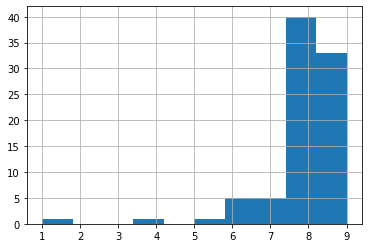

In [6]:
df['total_classes'].hist()

In [7]:
print(df.describe())

       total_classes        qlty
count      86.000000   86.000000
mean        8.046512   89.405685
std         1.245292   13.836579
min         1.000000   11.111111
25%         8.000000   88.888889
50%         8.000000   88.888889
75%         9.000000  100.000000
max         9.000000  100.000000


### sort accroding to descending class labels

In [8]:
sorted_df = df.sort_values('total_classes', ascending=False, ignore_index=True)
sorted_df

,image_id,masks_id,classes,total_classes,qlty,image_src,mask_src
0,17690_front.jpg,"(17690_front.jpg,)","[0, 81, 91, 99, 127, 132, 155, 189, 211, 213]",10,90.909091,..\..\data\unet_img\Data_TF_Scalerapid\Origina...,..\..\data\unet_img\Data_TF_Scalerapid\Mask\17...
1,5007_front.jpg,"(5007_front.jpg,)","[0, 81, 91, 99, 127, 132, 155, 189, 211, 213]",10,90.909091,..\..\data\unet_img\Data_TF_Scalerapid\Origina...,..\..\data\unet_img\Data_TF_Scalerapid\Mask\50...
2,4988_back.jpg,"(4988_back.jpg,)","[0, 81, 91, 99, 127, 132, 155, 189, 211, 213]",10,90.909091,..\..\data\unet_img\Data_TF_Scalerapid\Origina...,..\..\data\unet_img\Data_TF_Scalerapid\Mask\49...
3,5502_back.jpg,"(5502_back.jpg,)","[0, 81, 91, 99, 127, 132, 155, 189, 211, 213]",10,90.909091,..\..\data\unet_img\Data_TF_Scalerapid\Origina...,..\..\data\unet_img\Data_TF_Scalerapid\Mask\55...
4,5502_front.jpg,"(5502_front.jpg,)","[0, 81, 91, 99, 127, 132, 155, 189, 211, 213]",10,90.909091,..\..\data\unet_img\Data_TF_Scalerapid\Origina...,..\..\data\unet_img\Data_TF_Scalerapid\Mask\55...
5,4154_back.jpg,"(4154_back.jpg,)","[0, 81, 91, 99, 127, 132, 155, 189, 211, 213]",10,90.909091,..\..\data\unet_img\Data_TF_Scalerapid\Origina...,..\..\data\unet_img\Data_TF_Scalerapid\Mask\41...
6,17888_front.jpg,"(17888_front.jpg,)","[0, 81, 91, 99, 127, 132, 155, 189, 211, 213]",10,90.909091,..\..\data\unet_img\Data_TF_Scalerapid\Origina...,..\..\data\unet_img\Data_TF_Scalerapid\Mask\17...
7,5008_front.jpg,"(5008_front.jpg,)","[0, 81, 91, 99, 127, 132, 155, 189, 211, 213]",10,90.909091,..\..\data\unet_img\Data_TF_Scalerapid\Origina...,..\..\data\unet_img\Data_TF_Scalerapid\Mask\50...
8,6073_back.jpg,"(6073_back.jpg,)","[0, 81, 91, 99, 127, 132, 155, 189, 211, 213]",10,90.909091,..\..\data\unet_img\Data_TF_Scalerapid\Origina...,..\..\data\unet_img\Data_TF_Scalerapid\Mask\60...
9,6515_front.jpg,"(6515_front.jpg,)","[0, 81, 91, 99, 127, 132, 155, 189, 211, 213]",10,90.909091,..\..\data\unet_img\Data_TF_Scalerapid\Origina...,..\..\data\unet_img\Data_TF_Scalerapid\Mask\65...


### Train images

In [9]:
train_sorted_df = sorted_df.loc[sorted_df['qlty'] >= 70.]
train_sorted_df.head()

,image_id,masks_id,classes,total_classes,qlty,image_src,mask_src
0,4940_front.jpg,"(4940_front.png,)","[0, 3, 81, 118, 124, 147, 174, 210, 227]",9,100.0,..\..\data\unet_img\JPEGImages\4940_front.jpg,..\..\data\unet_img\SegmentationClass\4940_fro...
1,4935_back.jpg,"(4935_back.png,)","[0, 3, 81, 118, 124, 147, 174, 210, 227]",9,100.0,..\..\data\unet_img\JPEGImages\4935_back.jpg,..\..\data\unet_img\SegmentationClass\4935_bac...
2,4805_front.jpg,"(4805_front.png,)","[0, 3, 81, 118, 124, 147, 174, 210, 227]",9,100.0,..\..\data\unet_img\JPEGImages\4805_front.jpg,..\..\data\unet_img\SegmentationClass\4805_fro...
3,4805_back.jpg,"(4805_back.png,)","[0, 3, 81, 118, 124, 147, 174, 210, 227]",9,100.0,..\..\data\unet_img\JPEGImages\4805_back.jpg,..\..\data\unet_img\SegmentationClass\4805_bac...
4,4803_front.jpg,"(4803_front.png,)","[0, 3, 81, 118, 124, 147, 174, 210, 227]",9,100.0,..\..\data\unet_img\JPEGImages\4803_front.jpg,..\..\data\unet_img\SegmentationClass\4803_fro...


In [10]:
train_sorted_df.describe()

,total_classes,qlty
count,304.000000,304.000000
mean,7.884868,87.609649
std,0.785534,8.728158
min,7.000000,77.777778
25%,7.000000,77.777778
50%,8.000000,88.888889
75%,9.000000,100.000000
max,9.000000,100.000000


In [11]:
train_images = train_sorted_df['image_src']
for f in train_images:
    shutil.copy(f, '../../data/unet_img/Data_TF_397/train_image')
    
train_masks = train_sorted_df['mask_src']
for f in train_masks:
    shutil.copy(f, '../../data/unet_img/Data_TF_397/train_mask')

### Val images

In [12]:
val_sorted_df = sorted_df.loc[(sorted_df['qlty'] >= 45.) & (sorted_df['qlty'] <70.)]
val_sorted_df.head()

,image_id,masks_id,classes,total_classes,qlty,image_src,mask_src
304,4928_front.jpg,"(4928_front.png,)","[0, 3, 81, 118, 174, 227]",6,66.666667,..\..\data\unet_img\JPEGImages\4928_front.jpg,..\..\data\unet_img\SegmentationClass\4928_fro...
305,4937_back.jpg,"(4937_back.png,)","[0, 3, 118, 174, 210, 227]",6,66.666667,..\..\data\unet_img\JPEGImages\4937_back.jpg,..\..\data\unet_img\SegmentationClass\4937_bac...
306,4921_back.jpg,"(4921_back.png,)","[0, 3, 81, 118, 174, 210]",6,66.666667,..\..\data\unet_img\JPEGImages\4921_back.jpg,..\..\data\unet_img\SegmentationClass\4921_bac...
307,4938_front.jpg,"(4938_front.png,)","[0, 3, 81, 118, 174, 227]",6,66.666667,..\..\data\unet_img\JPEGImages\4938_front.jpg,..\..\data\unet_img\SegmentationClass\4938_fro...
308,4931_back.jpg,"(4931_back.png,)","[0, 3, 81, 118, 147, 227]",6,66.666667,..\..\data\unet_img\JPEGImages\4931_back.jpg,..\..\data\unet_img\SegmentationClass\4931_bac...


In [13]:
val_sorted_df.describe()

,total_classes,qlty
count,98.000000,98.000000
mean,5.622449,62.471655
std,0.487267,5.414076
min,5.000000,55.555556
25%,5.000000,55.555556
50%,6.000000,66.666667
75%,6.000000,66.666667
max,6.000000,66.666667


In [14]:
val_images = val_sorted_df['image_src']
for f in val_images:
    shutil.copy(f, '../../data/unet_img/Data_TF_397/val_image')
    
val_masks = val_sorted_df['mask_src']
for f in val_masks:
    shutil.copy(f, '../../data/unet_img/Data_TF_397/val_mask')

### test_images

In [15]:
test_sorted_df = sorted_df.loc[(sorted_df['qlty'] >= 0.) & (sorted_df['qlty'] <45.)]
test_sorted_df

,image_id,masks_id,classes,total_classes,qlty,image_src,mask_src
402,4674_front.jpg,"(4674_front.png,)","[0, 3, 174, 210]",4,44.444444,..\..\data\unet_img\JPEGImages\4674_front.jpg,..\..\data\unet_img\SegmentationClass\4674_fro...
403,4909_back.jpg,"(4909_back.png,)","[0, 118, 174, 227]",4,44.444444,..\..\data\unet_img\JPEGImages\4909_back.jpg,..\..\data\unet_img\SegmentationClass\4909_bac...
404,4847_back.jpg,"(4847_back.png,)","[0, 3, 174, 227]",4,44.444444,..\..\data\unet_img\JPEGImages\4847_back.jpg,..\..\data\unet_img\SegmentationClass\4847_bac...
405,4812_back.jpg,"(4812_back.png,)","[0, 3, 174, 227]",4,44.444444,..\..\data\unet_img\JPEGImages\4812_back.jpg,..\..\data\unet_img\SegmentationClass\4812_bac...
406,4903_front.jpg,"(4903_front.png,)","[0, 3, 210, 227]",4,44.444444,..\..\data\unet_img\JPEGImages\4903_front.jpg,..\..\data\unet_img\SegmentationClass\4903_fro...
407,4673_front.jpg,"(4673_front.png,)","[0, 3, 118, 147]",4,44.444444,..\..\data\unet_img\JPEGImages\4673_front.jpg,..\..\data\unet_img\SegmentationClass\4673_fro...
408,4852_back.jpg,"(4852_back.png,)","[0, 3, 174, 227]",4,44.444444,..\..\data\unet_img\JPEGImages\4852_back.jpg,..\..\data\unet_img\SegmentationClass\4852_bac...
409,4825_front.jpg,"(4825_front.png,)","[0, 3, 174, 227]",4,44.444444,..\..\data\unet_img\JPEGImages\4825_front.jpg,..\..\data\unet_img\SegmentationClass\4825_fro...
410,4656_back.jpg,"(4656_back.png,)","[0, 3, 174, 227]",4,44.444444,..\..\data\unet_img\JPEGImages\4656_back.jpg,..\..\data\unet_img\SegmentationClass\4656_bac...
411,4852_front.jpg,"(4852_front.png,)","[0, 3, 174, 227]",4,44.444444,..\..\data\unet_img\JPEGImages\4852_front.jpg,..\..\data\unet_img\SegmentationClass\4852_fro...


In [16]:
test_images = test_sorted_df['image_src']
for f in test_images:
    shutil.copy(f, '../../data/unet_img/Data_TF_397/test_image')
    
test_masks = test_sorted_df['mask_src']
for f in test_masks:
    shutil.copy(f, '../../data/unet_img/Data_TF_397/test_mask')